# Wholesale customers

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

from sklearn.preprocessing import MinMaxScaler  
from sklearn.cluster import KMeans  
from sklearn.cluster import AgglomerativeClustering  
from sklearn.cluster import DBSCAN  
import scipy.cluster.hierarchy as sc
from sklearn.decomposition import PCA 

## Загрузка данных

In [282]:
file_path = 'data.csv'
data_ter = pd.read_csv(file_path)

In [284]:
data = data_ter.copy()
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [286]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [290]:
data.drop(columns=['Channel','Region'],inplace=True)


In [292]:
data.isnull().sum()


Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [294]:
#Функция для нахождения выбросов в данных
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)  
    q3 = data[column].quantile(0.75) 
    IQR = q3 - q1 
    lower_bound = q1 - IQR * 1.5  
    upper_bound = q3 + IQR * 1.5  
    outliers = [] 
    for value in data[column]:
        if value > upper_bound or value < lower_bound:
            outliers.append(value)  
    print('Столбец:', column)
    print('Верхняя граница:', upper_bound, 'Нижняя граница:', lower_bound)
    print('Выбросы:', outliers)

In [296]:
#Функция для обработки выбросов в данных
def handle_outliers(data, column):
    q1 = data[column].quantile(0.25) 
    q3 = data[column].quantile(0.75) 
    IQR = q3 - q1  
    lower_bound = q1 - IQR * 1.5  
    upper_bound = q3 + IQR * 1.5  
    for i in data.index:
        value = data.loc[i, column]  
        if value > upper_bound:
            data.loc[i, column] = upper_bound  
        elif value < lower_bound:
            data.loc[i, column] = lower_bound 


### Визуализация данных с выбросами

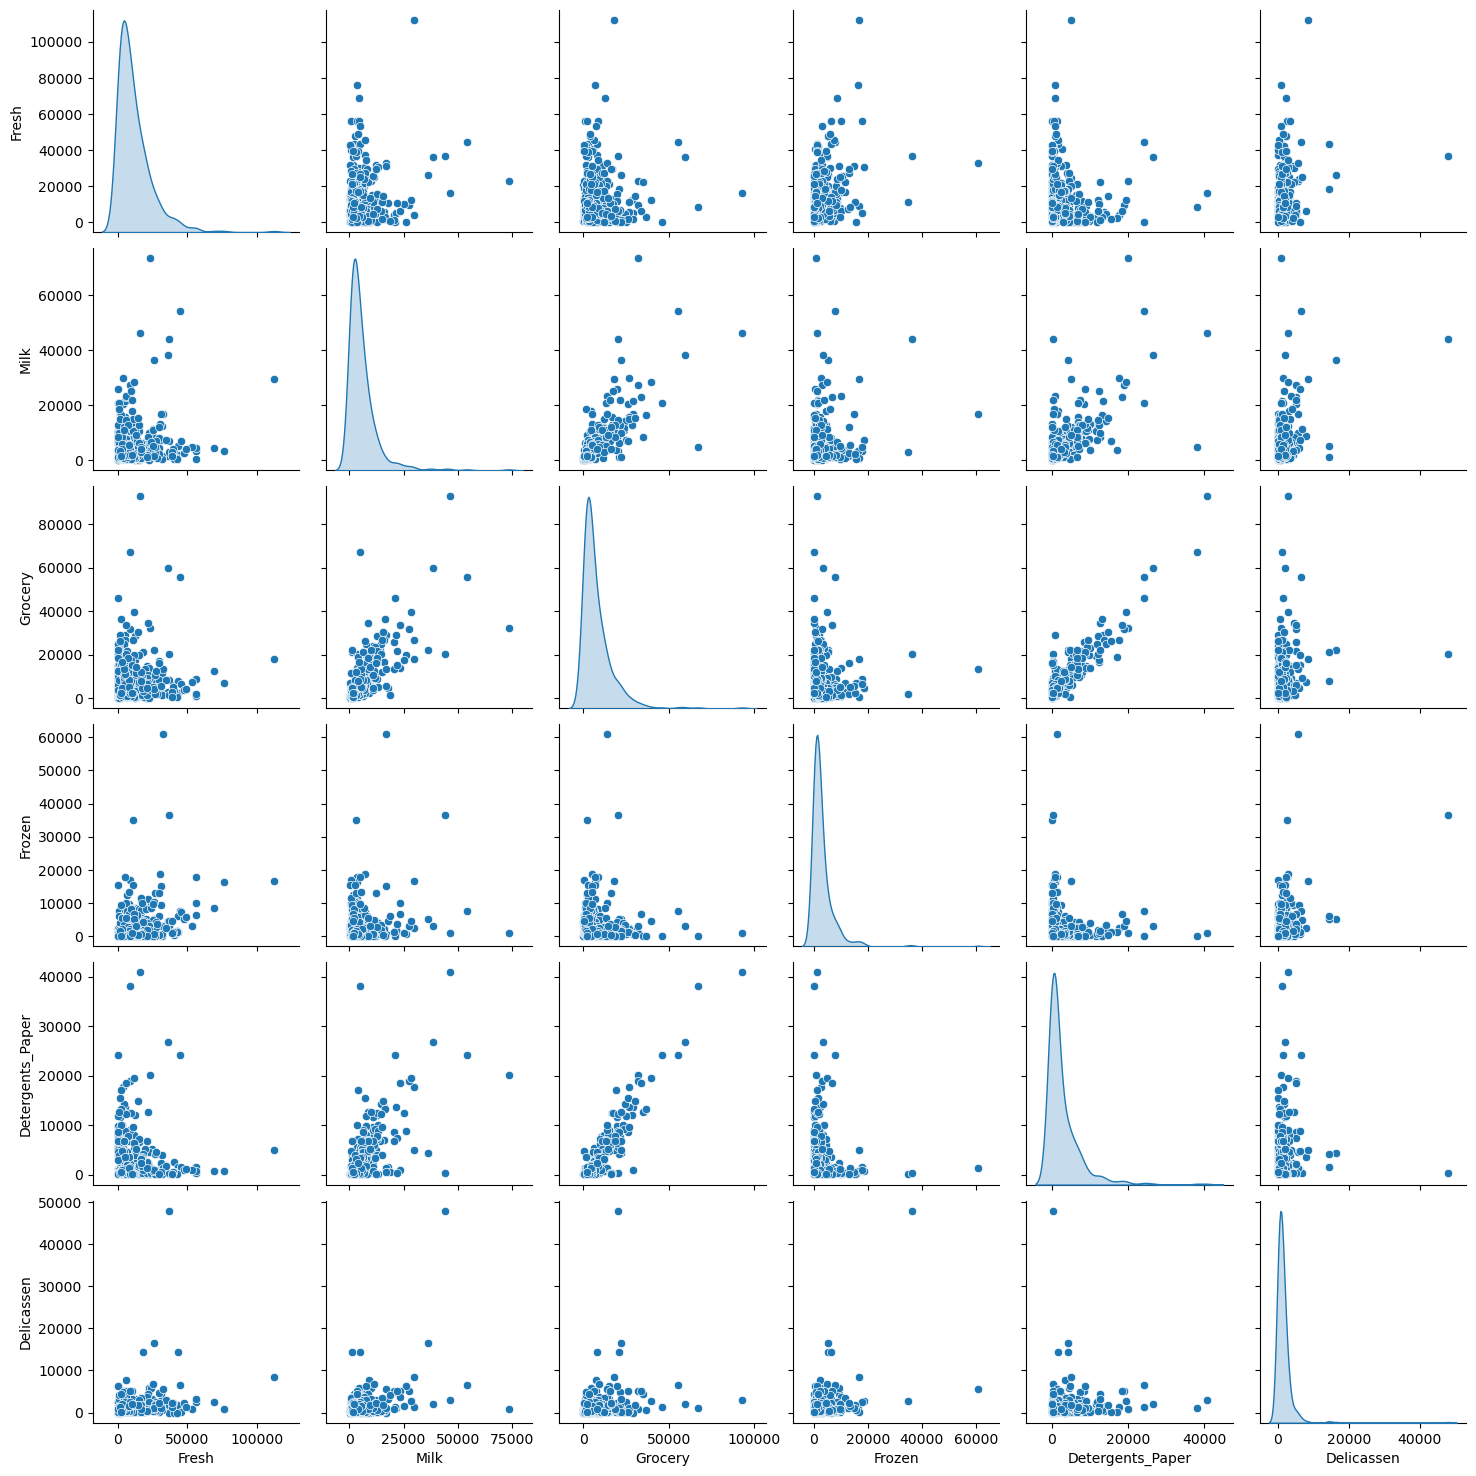

In [304]:
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.show()

Обнаружение выбросов в различных столбцах

In [306]:
detect_outliers(data, 'Fresh')
print("\n")
detect_outliers(data, 'Milk')
print("\n")

detect_outliers(data, 'Grocery')
print("\n")

detect_outliers(data, 'Frozen')
print("\n")

detect_outliers(data, 'Detergents_Paper')
print("\n")

detect_outliers(data, 'Delicassen')
print("\n")


Столбец: Fresh
Верхняя граница: 37642.75 Нижняя граница: -17581.25
Выбросы: [43088, 56159, 44466, 40721, 43265, 56082, 76237, 42312, 45640, 112151, 47493, 56083, 53205, 49063, 68951, 40254, 42786, 39679, 38793, 39228]


Столбец: Milk
Верхняя граница: 15676.125 Нижняя граница: -6952.875
Выбросы: [36423, 20484, 15729, 22044, 54259, 21412, 29892, 38369, 20959, 46197, 73498, 27472, 16729, 15726, 25862, 29627, 43950, 28326, 16599, 23133, 17972, 23527, 20655, 25071, 16784, 18664, 21858, 16687]


Столбец: Grocery
Верхняя граница: 23409.875 Нижняя граница: -10601.125
Выбросы: [25957, 23998, 55571, 28921, 26866, 59598, 45828, 28540, 92780, 32114, 32034, 28986, 34792, 26870, 24708, 23596, 39694, 36486, 33586, 24773, 26839, 67298, 26316, 30243]


Столбец: Frozen
Верхняя граница: 7772.25 Нижняя граница: -3475.75
Выбросы: [9408, 10002, 9510, 7782, 10643, 8872, 8132, 9735, 8693, 35009, 18028, 8853, 16538, 8195, 8425, 16745, 36534, 7888, 18711, 8321, 11422, 10155, 16919, 10303, 8692, 8366, 12569, 608

Обработка выбросов

In [313]:
handle_outliers(data, 'Fresh')
handle_outliers(data, 'Milk')
handle_outliers(data, 'Grocery')
handle_outliers(data, 'Frozen')
handle_outliers(data, 'Detergents_Paper')
handle_outliers(data, 'Delicassen')


### Визуализация данных без выбросов

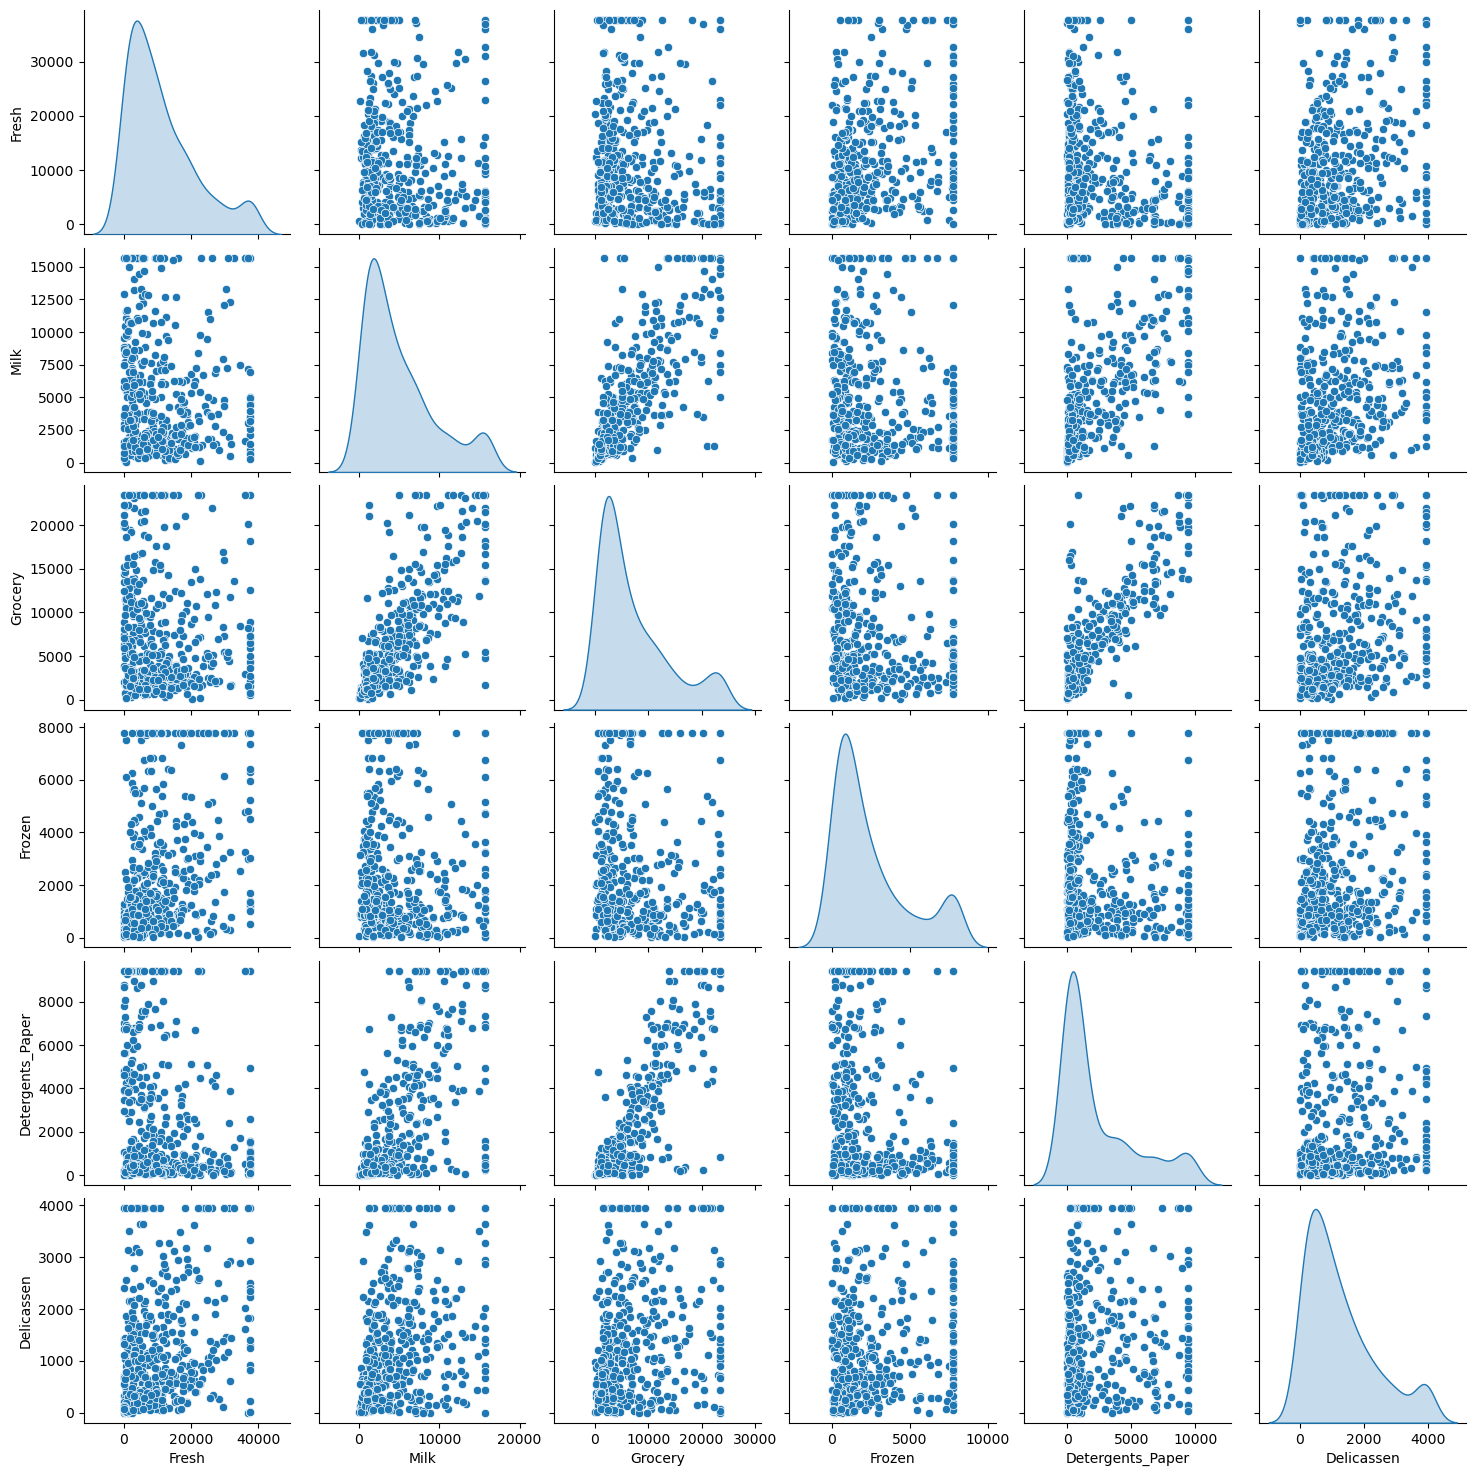

In [315]:
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.show()


Масштабируем данные

In [319]:
X = data.iloc[::].values  
print(X.shape) 

(440, 6)


In [321]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Модель KMeans


In [324]:
wcss = []  
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    model.fit(X)  
    wcss.append(model.inertia_)  

Строим график для метода локтя

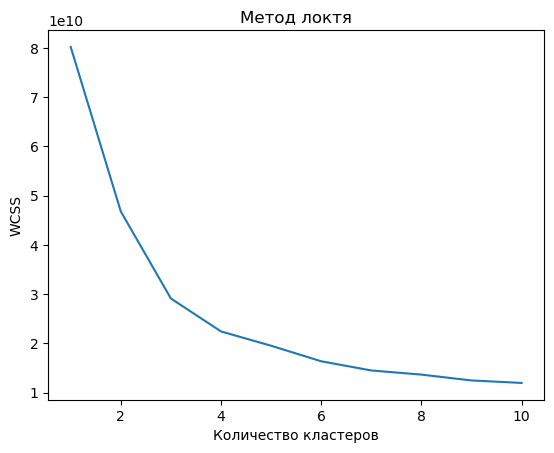

In [327]:
plt.plot(range(1, 11), wcss)
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

Кластеризация с выбранным количеством кластеров

In [332]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_scaled = KMeans(n_clusters=4, init='k-means++', random_state=42)


Обучение и предсказание модели на данных

In [337]:
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans.shape) 
print(y_kmeans)


(440,)
[2 3 0 2 2 0 2 0 0 3 3 2 1 2 1 0 3 0 2 0 2 0 1 1 1 2 0 2 3 1 2 0 2 1 0 0 1
 3 3 1 1 2 3 3 3 3 3 1 2 3 0 0 1 3 1 0 3 3 2 0 0 1 0 3 0 3 0 2 0 0 2 3 0 2
 0 2 0 3 2 0 0 3 3 2 2 3 3 1 0 1 2 2 3 2 3 0 0 0 0 0 3 3 0 1 2 2 3 3 0 3 2
 3 2 2 2 2 2 0 2 0 2 0 2 2 1 1 2 2 0 1 0 0 2 0 0 0 0 0 2 0 2 1 1 2 2 3 0 0
 0 1 2 0 2 0 0 3 3 2 0 3 3 2 2 3 0 3 0 0 0 0 3 3 0 3 0 3 1 2 2 0 2 1 3 1 0
 0 0 0 3 3 2 2 0 3 0 2 1 3 2 0 3 3 1 0 0 3 0 0 0 3 2 3 0 0 3 3 3 2 3 0 2 3
 0 0 0 2 2 0 0 0 2 0 1 0 2 0 0 2 0 1 2 2 2 2 3 3 0 2 2 0 0 3 0 1 2 1 2 0 1
 1 0 0 2 0 3 3 3 2 3 2 0 0 0 1 0 0 1 0 2 2 0 2 1 1 1 1 0 2 2 1 0 0 0 3 2 0
 2 0 0 0 2 3 0 3 3 3 3 2 0 3 0 1 3 0 2 3 0 0 2 3 0 0 2 2 1 1 0 0 2 0 0 3 2
 3 2 1 2 0 0 0 0 3 0 3 0 0 3 1 0 3 0 3 0 3 2 0 2 3 0 0 2 0 0 0 0 0 0 0 2 0
 1 2 0 2 0 0 3 1 0 0 1 2 1 0 3 2 0 2 0 0 0 0 0 2 2 0 3 2 2 0 0 1 1 1 2 0 1
 3 0 0 0 0 0 0 0 0 3 0 3 0 3 2 1 2 2 2 3 1 0 0 3 0 2 0 2 1 1 3 0 0]


Обучение и предсказание модели на масштабированных данных

In [344]:
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)
print(y_kmeans_scaled.shape)  
print(y_kmeans_scaled)

(440,)
[2 0 3 1 3 2 2 2 2 0 0 2 3 0 3 2 0 2 3 2 2 2 1 3 3 2 2 2 3 2 3 2 2 1 2 0 3
 0 0 1 1 2 0 0 0 3 0 3 0 0 2 2 2 0 2 2 0 0 2 2 2 3 2 0 2 0 2 0 1 2 1 3 1 1
 2 1 1 0 2 2 2 0 3 2 2 3 0 1 1 1 2 1 3 1 0 2 2 2 2 1 3 0 0 1 2 2 0 0 2 0 2
 0 1 2 2 2 2 2 1 2 2 2 2 2 1 1 1 3 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 1 2 3 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 0 2 3 3 2 2 2 0 3 2 0 2 0 1 2 2 1 2 3 0 3 2
 2 2 1 0 0 1 2 2 0 2 1 1 0 2 2 0 0 3 2 2 0 2 2 2 0 2 3 2 2 0 0 0 2 3 2 2 0
 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 1 1 2 2 2 0 0 2 2 2 1 2 3 1 2 3 1 2 1 1
 1 2 1 2 2 0 3 0 1 0 2 1 2 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 1 2 2 2 2 2 0 2 2
 2 2 2 2 2 0 0 0 0 0 0 2 2 0 1 2 0 2 2 3 2 2 2 0 2 2 2 2 2 3 2 2 1 1 2 0 2
 0 1 3 2 1 1 1 0 0 2 0 2 2 0 3 2 0 2 0 2 0 1 2 2 0 3 2 2 2 2 2 2 3 2 2 2 2
 2 1 2 3 2 2 0 2 2 2 1 1 3 2 3 2 2 2 2 2 1 2 2 1 2 2 3 1 1 2 2 1 2 2 1 2 1
 0 2 3 2 2 2 1 1 2 0 2 0 2 0 2 2 2 2 1 3 1 2 2 2 1 2 2 2 1 1 0 2 2]


Визуализация кластеров

In [349]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

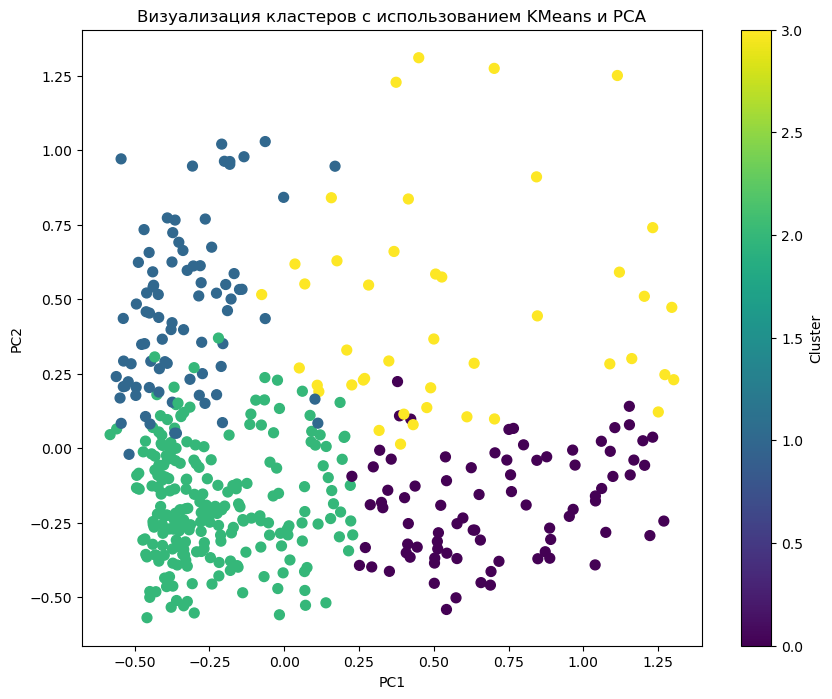

In [351]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_scaled, cmap='viridis', s=50)
plt.title('Визуализация кластеров с использованием KMeans и PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Кластеризация клиентов с помощью K-Means

### Цель: 

Использование аалгоритма K-Means для выделения кластеров клиентов с похожими характеристиками.

## 1. Исследовательский анализ данных (EDA)
### Статистическое описание данных:  
Мы проверяем базовую статистику данных, такие как средние значения, медианы, минимальные и максимальные значения.

In [383]:
data.describe()  # Статистическое описание данных


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.00000,440.000000,440.000000,440.000000
mean,11357.568182,5048.592045,7236.37500,2507.085795,2392.616477,1266.715341
std,10211.542235,4386.377073,6596.53308,2408.297738,2940.794090,1083.069792
min,3.000000,55.000000,3.00000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.00000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.50000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.75000,3554.250000,3922.000000,1820.250000
max,37642.750000,15676.125000,23409.87500,7772.250000,9419.875000,3938.250000


### Информация о типах данных
    Проверяем типы данных и количество значений в каждом столбце.

In [388]:
data.info()  # Информация о данных


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


### Анализ распределения категориальных признаков

Мы анализируем категориальные признаки, такие как "Channel" и "Region", чтобы понять их распределение.


# 2. Предварительная обработка данных

## Обработка выбросов

Для выявления выбросов используется метод межквартильного размаха (IQR). Для каждого признака, мы вычисляем квартильный размах и определяем выбросы как значения, которые лежат за пределами:

нижняя граница=Q1−1.5×IQR



верхняя граница=Q3+1.5×IQR

Если значение выходит за эти границы, оно считается выбросом.

# 3.Моделирование

### 1)Масштабирование данных

Перед кластеризацией данные масштабируются с использованием MinMaxScaler, который преобразует все признаки в диапазон от 0 до 1:

$$
x' = (x - min(x))/(max(x)-min(x))
$$

### 2)Кластеризация с использованием K-Means

Мы используем метод K-Means, который минимизирует инерцию внутри кластеров. Инерция рассчитывается по формуле:

$$
WCSS = \sum_{i=1}^{n} \sum_{k=1}^{K} r_{ik} \| x_i - \mu_k \|^2
$$

Алгоритм K-Means ищет такое разбиение на кластеры, при котором сумма квадратов расстояний между объектами и центроидами минимальна.

### Выбор числа кластеров


Из метода локтя мы выбираем оптимальное количество кластеров, равное 4, и обучаем модель KMeans.

# 4.Визуализация кластеров

Для визуализации кластеров мы применяем метод PCA для снижения размерности данных до двух компонент.

## Заключение


В ходе выполнения анализа были использованы математические методы для нормализации данных, обнаружения выбросов, кластеризации с использованием алгоритма K-Means и визуализации кластеров с помощью PCA. Алгоритм K-Means показал хорошую эффективность в выделении кластеров с похожими характеристиками клиентов. Мы использовали метод локтя для выбора оптимального числа кластеров и визуализировали результаты в 2D пространстве.